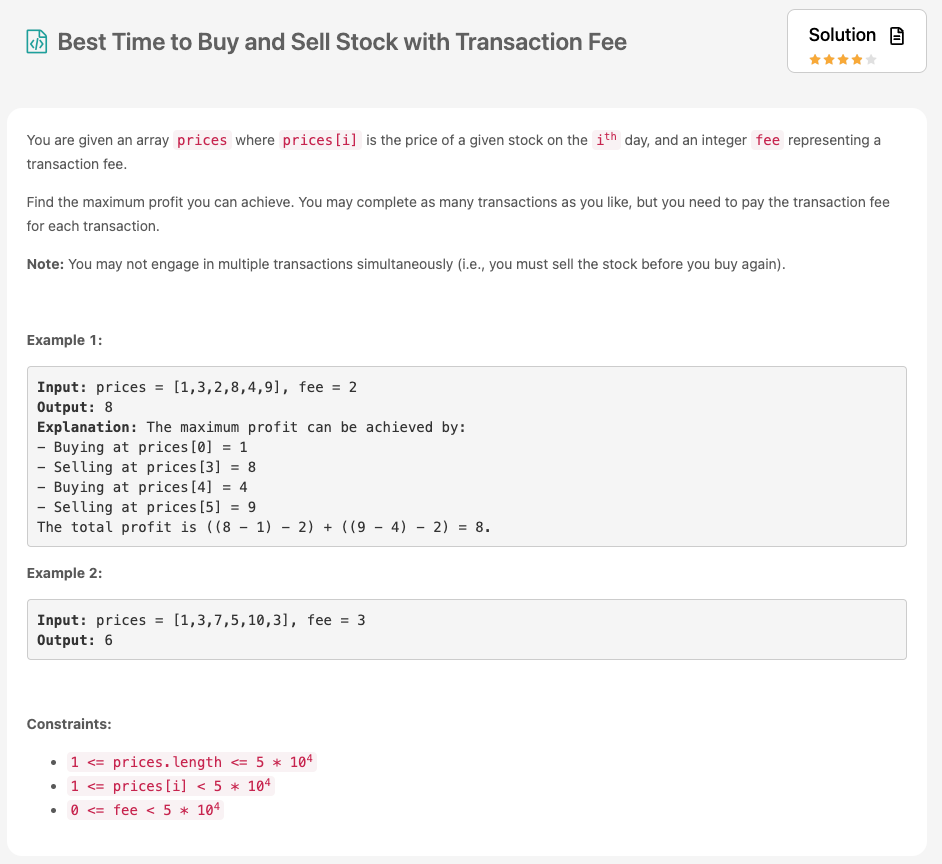

In [ ]:
# Accepted
class Solution:
    def maxProfit(self, prices: List[int], fee: int) -> int:
        @lru_cache(None)
        def dp(i, holding):
            # Base case
            if i == len(prices): 
                return 0
            
            do_nothing = dp(i + 1, holding)
            #do_something = 0

            if holding:
                # Sell stock
                do_something = prices[i] + dp(i + 1, 0) - fee
            else:
                # Buy stock
                do_something = -prices[i] + dp(i + 1,  1)

            # Recurrence relation
            return max(do_nothing, do_something)

        return dp(0, 0)

In [ ]:
# Standard
class Solution(object):
    def maxProfit(self, prices, fee):
        cash, hold = 0, -prices[0]
        for i in range(1, len(prices)):
            cash = max(cash, hold + prices[i] - fee)
            hold = max(hold, cash - prices[i])
        return cash

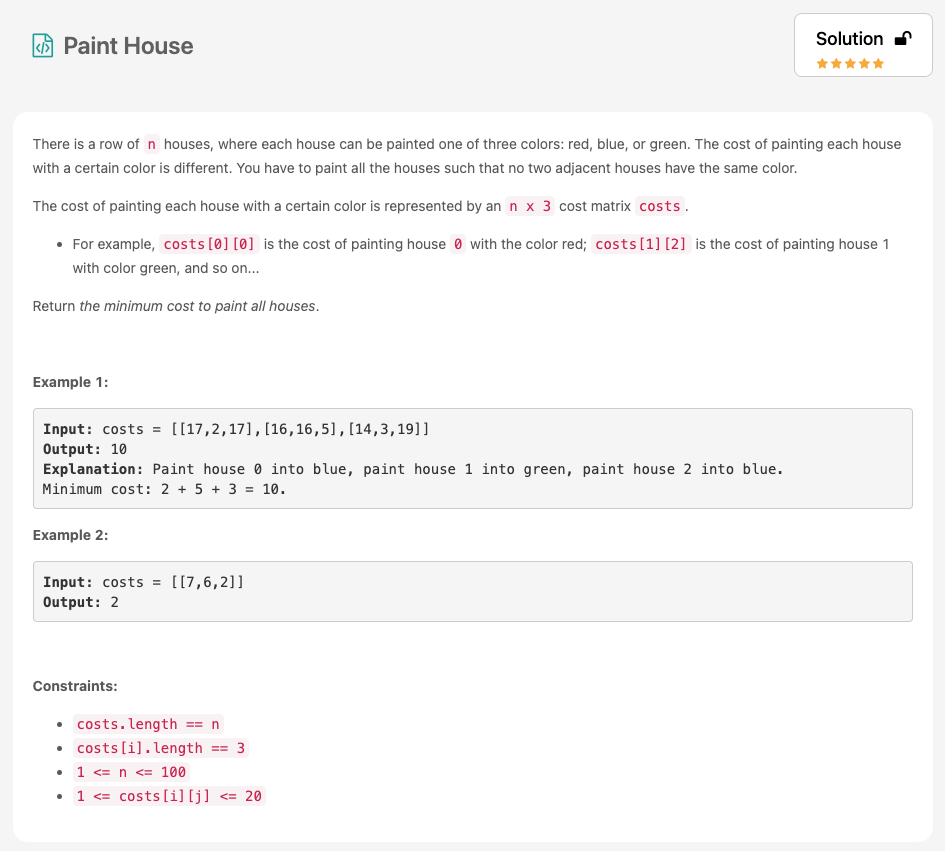

In [ ]:
#Paint House

# Accepted
class Solution:
    def minCost(self, costs: List[List[int]]) -> int:
        @lru_cache(None)
        def dp(pre_color, cur_house):
            if cur_house == len(costs)-1:
                cost = []
                for i,x in enumerate(costs[cur_house]):
                    if i != pre_color:
                        cost.append(x)
                return min(cost)
            else:
                cost = []
                for i,x in enumerate(costs[cur_house]):
                    if i != pre_color:
                        cost.append(x+dp(i, cur_house+1))
                return min(cost)
            
        return dp(-1,0)

In [ ]:
# Approach 4: Dynamic Programming
def minCost(self, costs: List[List[int]]) -> int:    
    for n in reversed(range(len(costs) - 1)):
        # Total cost of painting nth house red.
        costs[n][0] += min(costs[n + 1][1], costs[n + 1][2])
        # Total cost of painting nth house green.
        costs[n][1] += min(costs[n + 1][0], costs[n + 1][2])
        # Total cost of painting nth house blue.
        costs[n][2] += min(costs[n + 1][0], costs[n + 1][1])

    if len(costs) == 0: return 0
    return min(costs[0]) # Return the minimum in the first row.

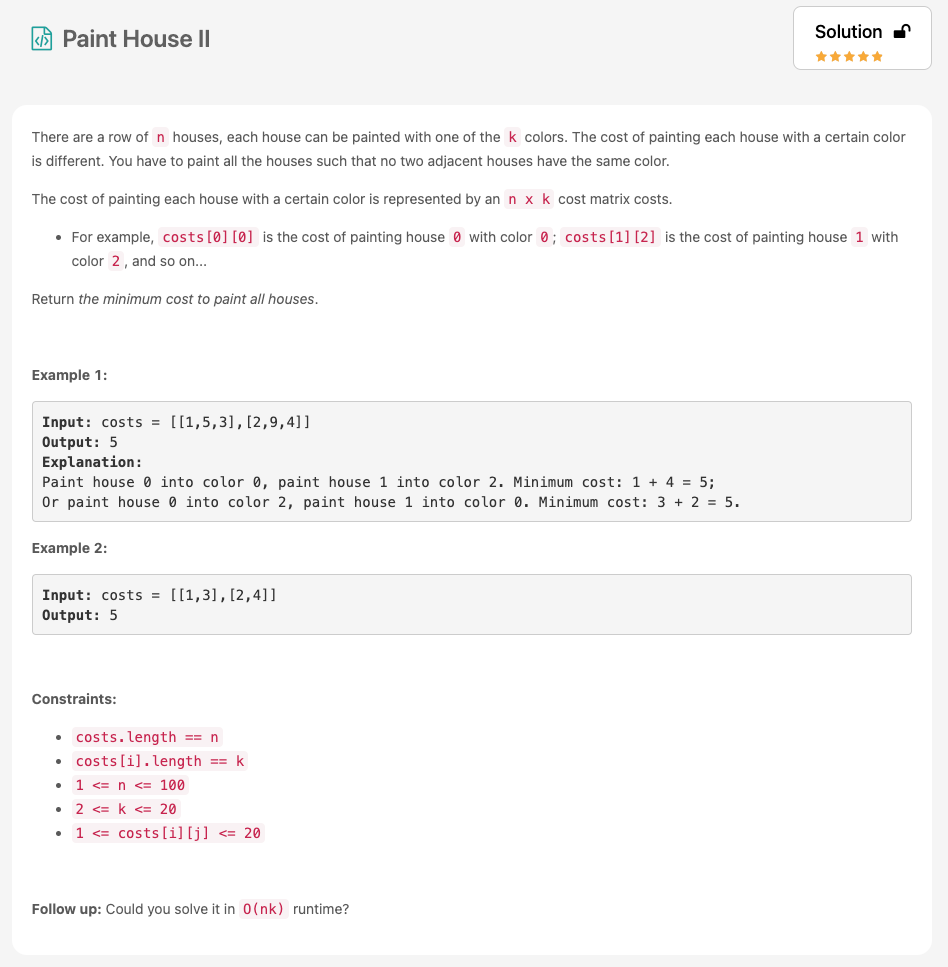

In [ ]:
# Painted House II

class Solution:
    def minCostII(self, costs: List[List[int]]) -> int:
        @lru_cache(None)
        def dp(pre_color, cur_house):
            if cur_house == len(costs)-1:
                cost = []
                for i,x in enumerate(costs[cur_house]):
                    if i != pre_color:
                        cost.append(x)
                return min(cost)
            else:
                cost = []
                for i,x in enumerate(costs[cur_house]):
                    if i != pre_color:
                        cost.append(x+dp(i, cur_house+1))
                return min(cost)
            
        return dp(-1,0)

In [ ]:
# Approach 2: Dynamic Programming
class Solution:
    def minCostII(self, costs: List[List[int]]) -> int:

        n = len(costs)
        if n == 0: return 0
        k = len(costs[0])

        for house in range(1, n):
            for color in range(k):
                best = math.inf
                for previous_color in range(k):
                    if color == previous_color: continue
                    best = min(best, costs[house - 1][previous_color])
                costs[house][color] += best

        return min(costs[-1])

In [ ]:
# Approach 3: Dynamic Programming with O(k) additional Space.
def minCostII(self, costs: List[List[int]]) -> int:

    n = len(costs)
    if n == 0: return 0
    k = len(costs[0])

    previous_row = costs[0]

    for house in range(1, n):
        current_row = [0] * k
        for color in range(k):
            best = math.inf
            for previous_color in range(k):
                if color == previous_color: continue
                best = min(best, previous_row[previous_color])
            current_row[color] += costs[house][color] + best
        previous_row = current_row

    return min(previous_row)

In [ ]:
# Approach 5: Dynamic programming with Optimized Time and Space
class Solution:
    def minCostII(self, costs: List[List[int]]) -> int:
        n = len(costs)
        if n == 0: return 0 # This is a valid case.
        k = len(costs[0])

        # Firstly, we need to determine the 2 lowest costs of
        # the first row. We also need to remember the color of
        # the lowest.
        prev_min_cost = prev_second_min_cost = prev_min_color = None
        for color, cost in enumerate(costs[0]):
            if prev_min_cost is None or cost < prev_min_cost:
                prev_second_min_cost = prev_min_cost
                prev_min_color = color
                prev_min_cost = cost
            elif prev_second_min_cost is None or cost < prev_second_min_cost:
                prev_second_min_cost = cost

        # And now, we need to work our way down, keeping track of the minimums.
        for house in range(1, n):
            min_cost = second_min_cost = min_color = None
            for color in range(k):
                # Determime cost for this cell (without writing it into input array.)
                cost = costs[house][color]
                if color == prev_min_color:
                    cost += prev_second_min_cost
                else:
                    cost += prev_min_cost
                # And work out whether or not it is a current minimum.
                if min_cost is None or cost < min_cost:
                    second_min_cost = min_cost
                    min_color = color
                    min_cost = cost
                elif second_min_cost is None or cost < second_min_cost:
                    second_min_cost = cost
            # Transfer currents to be prevs.
            prev_min_cost = min_cost
            prev_min_color = min_color
            prev_second_min_cost = second_min_cost

        return prev_min_cost

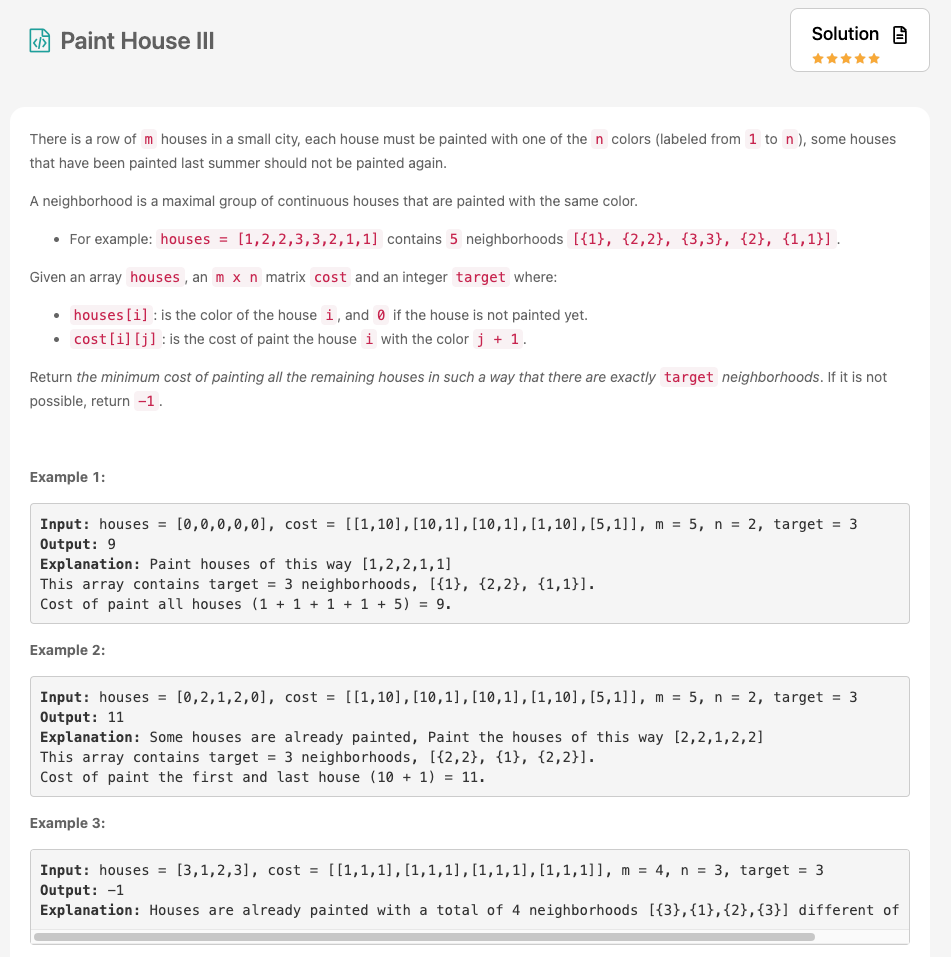

In [ ]:
# Paint House III

class Solution:
    def minCost(self, houses: List[int], cost: List[List[int]], m: int, n: int, target: int) -> int:

        @lru_cache(None)
        def dp(pre_color, cur_house, k_left):
            if k_left<0:
                return float('inf')
            
            if cur_house == len(cost)-1:
#                 print()
#                 # print('tata')
#                 print(k_left)
#                 print(cur_house)
#                 print(pre_color)
                
                # Base Case
                if k_left>1:
                    return float("inf")
                
                tmp = []
                if k_left==1:
                    if houses[cur_house]!=0:
                        if houses[cur_house]==pre_color:
                            return float("inf")
                        else:
                            return 0
                    else:
                        for i,x in enumerate(cost[cur_house]):
                            i=i+1
                            if i != pre_color:
                                tmp.append(x)
                        
                else: 
                    if houses[cur_house]!=0:
                        if houses[cur_house]==pre_color:
                            return 0b
                        else:
                            return float("inf")
                    else:
                        if pre_color!=-1: 
                            tmp.append(cost[cur_house][pre_color-1])  
                # print(min(tmp))
                # print('tata')
                # print('tata1:',tmp)
                return min(tmp)
            else:
                                
                tmp = []
                if houses[cur_house]!=0:
                    if houses[cur_house]==pre_color:
                        tmp.append(0+dp(pre_color, cur_house+1, k_left))
                    else:
                        tmp.append(0+dp(houses[cur_house], cur_house+1, k_left-1))
                else:
                    for i,x in enumerate(cost[cur_house]):
                        i=i+1
                        if i != pre_color:
                            tmp.append(x+dp(i, cur_house+1, k_left-1))
                    if pre_color != -1:
                        tmp.append(cost[cur_house][pre_color-1]+dp(pre_color, cur_house+1, k_left))

                # print(min(tmp))
                # print('tata2:',tmp)
                return min(tmp)
        
        result = dp(-1,0,target)
        if result == float('inf'):
            result = -1
            
        return result 

### Approach 1: Top-Down Dynamic Programming

``` java
class Solution {
    // Assign the size as per maximum value for different params
    Integer[][][] memo = new Integer[100][100][21];
    // Maximum cost possible plus 1
    final int MAX_COST = 1000001;
    
    int findMinCost(int[] houses, int[][] cost, int targetCount, int currIndex,
                    int neighborhoodCount, int prevHouseColor) {
        if (currIndex == houses.length) {
            // If all houses are traversed, check if the neighbor count is as expected or not
            return neighborhoodCount == targetCount ? 0 : MAX_COST;
        }
        
        if (neighborhoodCount > targetCount) {
            // If the neighborhoods are more than the threshold, we can't have target neighborhoods
            return MAX_COST;
        }
        
        // We have already calculated the answer so no need to go into recursion
        if (memo[currIndex][neighborhoodCount][prevHouseColor] != null) {
            return memo[currIndex][neighborhoodCount][prevHouseColor];
        }
        
        int minCost = MAX_COST;
        // If the house is already painted, update the values accordingly
        if (houses[currIndex] != 0) {
            int newNeighborhoodCount = neighborhoodCount + (houses[currIndex] != prevHouseColor ? 1 : 0);
            minCost = 
                findMinCost(houses, cost, targetCount, currIndex + 1, newNeighborhoodCount, houses[currIndex]);
        } else {
            int totalColors = cost[0].length;
            
            // If the house is not painted, try every possible color and store the minimum cost
            for (int color = 1; color <= totalColors; color++) {
                int newNeighborhoodCount = neighborhoodCount + (color != prevHouseColor ? 1 : 0);
                int currCost = cost[currIndex][color - 1] 
                    + findMinCost(houses, cost, targetCount, currIndex + 1, newNeighborhoodCount, color);
                minCost = Math.min(minCost, currCost);
            }
        }
        
        // Return the minimum cost and also storing it for future reference (memoization)
        return memo[currIndex][neighborhoodCount][prevHouseColor] = minCost;
    }
    
    public int minCost(int[] houses, int[][] cost, int m, int n, int target) {
        int answer = findMinCost(houses, cost, target, 0, 0, 0);
        // Return -1 if the answer is MAX_COST as it implies no answer possible
        return answer == MAX_COST ? -1 : answer;
    }
}
```

### Approach 2: Bottom-Up Dynamic Programming
```java
class Solution {
    // Maximum cost possible plus 1
    final int MAX_COST = 1000001;
    
    public int minCost(int[] houses, int[][] cost, int m, int n, int target) {
        int[][][] memo = new int[m][target + 1][n];
      
        // Initialize memo array
        for (int i = 0; i < m; i++) {
            for (int j = 0; j <= target; j++) {
                Arrays.fill(memo[i][j], MAX_COST);
            }
        }
            
        // Initialize for house 0, neighborhoods will be 1
        for (int color = 1; color <= n; color++) {
            if (houses[0] == color) {
                // If the house has same color, no cost
                memo[0][1][color - 1] = 0;
            } else if (houses[0] == 0) {
                // If the house is not painted, assign the corresponding cost
                memo[0][1][color - 1] = cost[0][color - 1];
            }
        }
        
        for (int house = 1; house < m; house++) {
            for (int neighborhoods = 1; neighborhoods <= Math.min(target, house + 1); neighborhoods++) {
                for (int color = 1; color <= n; color++) {
                    // If the house is already painted, and color is different
                    if (houses[house] != 0 && color != houses[house]) {
                        // Cannot be painted with different color
                        continue;
                    }
 
                    int currCost = MAX_COST;
                    // Iterate over all the possible color for previous house
                    for (int prevColor = 1; prevColor <= n; prevColor++) {
                        if (prevColor != color) {
                            // Decrement the neighborhood as adjacent houses has different color
                            currCost = Math.min(currCost, memo[house - 1][neighborhoods - 1][prevColor - 1]);
                        } else {
                            // Previous house has the same color, no change in neighborhood count
                            currCost = Math.min(currCost, memo[house - 1][neighborhoods][color - 1]);
                        }
                    }

                    // If the house is already painted, cost to paint is 0
                    int costToPaint = houses[house] != 0 ? 0 : cost[house][color - 1];
                    memo[house][neighborhoods][color - 1] = currCost + costToPaint;
                }
            }
        }
        
        int minCost = MAX_COST;
        // Find the minimum cost with m houses and target neighborhoods
        // By comparing cost for different color for the last house
        for (int color = 1; color <= n; color++) {
            minCost = Math.min(minCost, memo[m - 1][target][color - 1]);
        }
        
        // Return -1 if the answer is MAX_COST as it implies no answer possible
        return minCost == MAX_COST ? -1 : minCost;
    }
}

```

### Approach 3: Bottom-Up Dynamic Programming (Space Optimized)

```java
class Solution {
    // Maximum cost possible plus 1
    final int MAX_COST = 1000001;
    
    public int minCost(int[] houses, int[][] cost, int m, int n, int target) {
        int[][] prevMemo = new int[target + 1][n];
      
        // Initialize prevMemo array
        for (int i = 0; i <= target; i++) {
            Arrays.fill(prevMemo[i], MAX_COST);
        }
            
        // Initialize for house 0, neighborhood will be 1
        for (int color = 1; color <= n; color++) {
            if (houses[0] == color) {
                // If the house has same color, no cost
                prevMemo[1][color - 1] = 0;
            } else if (houses[0] == 0) {
                // If the house is not painted, assign the corresponding cost
                prevMemo[1][color - 1] = cost[0][color - 1];
            }
        }
        
        for (int house = 1; house < m; house++) {
            int[][] memo = new int[target + 1][n];
      
            // Initialize memo array
            for (int i = 0; i <= target; i++) {
                Arrays.fill(memo[i], MAX_COST);
            }
            
            for (int neighborhoods = 1; neighborhoods <= Math.min(target, house + 1); neighborhoods++) {
                for (int color = 1; color <= n; color++) {
                    
                    // If the house is already painted, and color is different
                    if (houses[house] != 0 && color != houses[house]) {
                        // Cannot be painted with different color
                        continue;
                    }
 
                    int currCost = MAX_COST;
                    // Iterate over all the possible color for previous house
                    for (int prevColor = 1; prevColor <= n; prevColor++) {
                        if (prevColor != color) {
                            // Decrement the neighborhood as adjacent houses has different color
                            currCost = Math.min(currCost, prevMemo[neighborhoods - 1][prevColor - 1]);
                        } else {
                            // Previous house has the same color, no change in neighborhood count
                            currCost = Math.min(currCost, prevMemo[neighborhoods][color - 1]);
                        }
                    }

                    // If the house is already painted cost to paint is 0
                    int costToPaint = houses[house] != 0 ? 0 : cost[house][color - 1];
                    memo[neighborhoods][color - 1] = currCost + costToPaint;
                }
            }
            // Update the table to have the current house results
            prevMemo = memo;
        }
        
        int minCost = MAX_COST;
        // Find the minimum cost with m houses and target neighborhoods
        // By comparing cost for different color for the last house
        for (int color = 1; color <= n; color++) {
            minCost = Math.min(minCost, prevMemo[target][color - 1]);
        }
        
        // Return -1 if the answer is MAX_COST as it implies no answer possible
        return minCost == MAX_COST ? -1 : minCost;
    }
}

```

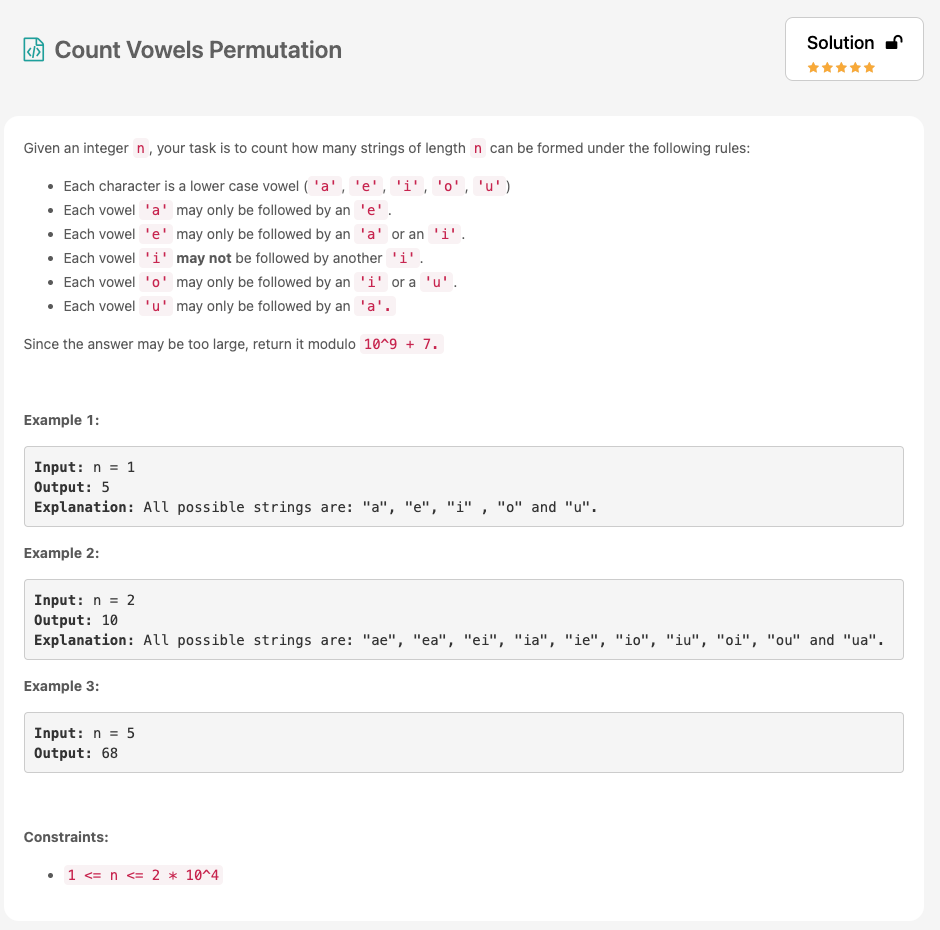

In [ ]:
class Solution:
    def countVowelPermutation(self, n: int) -> int:
        @lru_cache(None)
        def dp(pre_word, i):
            
            if i<1:
                return 0
            
            elif i==1:
                if pre_word=='a':
                    return 1
                elif pre_word=='e':
                    return 2
                elif pre_word=='i':
                    return 4
                elif pre_word=='o':
                    return 2
                elif pre_word=='u':
                    return 1
                else:
                    return 5
            else:
                if pre_word=='a':
                    return dp('e',i-1)
                elif pre_word=='e':
                    return dp('a',i-1) + dp('i',i-1)
                elif pre_word=='i':
                    return dp('a',i-1) + dp('e',i-1) + dp('o',i-1) + dp('u',i-1)
                elif pre_word=='o':
                    return dp('i',i-1) + dp('u',i-1)
                elif pre_word=='u':
                    return dp('a',i-1)
                else:
                    return dp('a',i-1) + dp('e',i-1) + dp('i',i-1) + dp('o',i-1) + dp('u',i-1)
            
        return dp('',n) % (10**9+7)

In [ ]:
# Approach 1: Dynamic Programming (Bottom-up)
class Solution:
    def countVowelPermutation(self, n: int) -> int:

        a_vowel_permutation_count = [1] * n
        e_vowel_permutation_count = [1] * n
        i_vowel_permutation_count = [1] * n
        o_vowel_permutation_count = [1] * n
        u_vowel_permutation_count = [1] * n

        MOD = 10 ** 9 + 7

        for i in range(1, n):
            a_vowel_permutation_count[i] = (e_vowel_permutation_count[i - 1] + i_vowel_permutation_count[i - 1] + u_vowel_permutation_count[i - 1]) % MOD
            e_vowel_permutation_count[i] = (a_vowel_permutation_count[i - 1] + i_vowel_permutation_count[i - 1]) % MOD
            i_vowel_permutation_count[i] = (e_vowel_permutation_count[i - 1] + o_vowel_permutation_count[i - 1]) % MOD
            o_vowel_permutation_count[i] = (i_vowel_permutation_count[i - 1]) % MOD
            u_vowel_permutation_count[i] = (i_vowel_permutation_count[i - 1] + o_vowel_permutation_count[i - 1]) % MOD

        result = 0

        result = (a_vowel_permutation_count[n - 1] + e_vowel_permutation_count[n - 1] + \
                  i_vowel_permutation_count[n - 1] + o_vowel_permutation_count[n - 1] + \
                  u_vowel_permutation_count[n - 1]) % MOD

        return result

In [ ]:
# Approach 2: Dynamic Programming (Bottom-up) with Optimized Space
class Solution:
    def countVowelPermutation(self, n: int) -> int:
        # initialize the number of strings ending with a, e, i, o, u
        a_count = e_count = i_count = o_count = u_count = 1
        MOD = 10 ** 9 + 7

        for i in range(1, n):
            a_count_new = (e_count + i_count + u_count) % MOD
            e_count_new = (a_count + i_count) % MOD
            i_count_new = (e_count + o_count) % MOD
            o_count_new = (i_count) % MOD
            u_count_new = (i_count + o_count) % MOD

            # https://docs.python.org/3/reference/expressions.html#evaluation-order
            a_count, e_count, i_count, o_count, u_count = \
                a_count_new, e_count_new, i_count_new, o_count_new, u_count_new

        return (a_count + e_count + i_count + o_count + u_count) % MOD

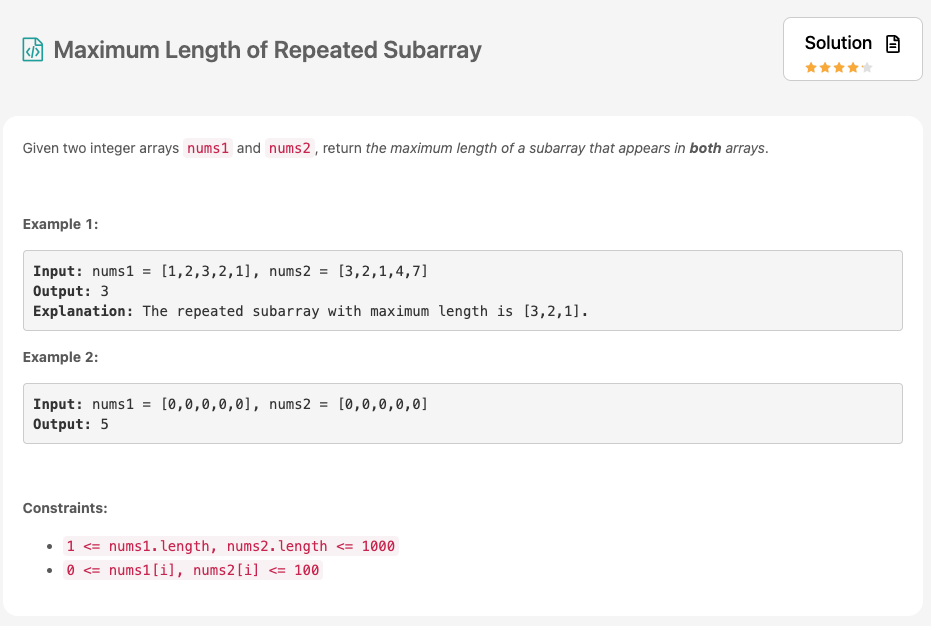

In [ ]:
# Maximum Length of Repeated Subarray


In [5]:
list(range(10,0,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [7]:
nums1=9
length =2
[[0]*length for i in range(nums1)]

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]

In [8]:
[[0, 0, 0, 0, 0, 0], 
 [0, 1, 0, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0], 
 [0, 2, 0, 0, 0, 0], 
 [0, 0, 1, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0]]

[[0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 2, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

In [ ]:
[[0, 0, 0, 0, 0, 0], 
 [0, 4, 3, 2, 1, 0], 
 [0, 3, 3, 2, 1, 0], 
 [0, 2, 2, 2, 1, 0], 
 [0, 1, 1, 1, 1, 0], 
 [0, 0, 0, 0, 0, 0]]

In [ ]:
# Accepted v1
class Solution:
    def findLength(self, nums1: List[int], nums2: List[int]) -> int:
        target_matrix = [[0]*(len(nums2)+1) for i in range(len(nums1)+1)]
        max_ans = 0
        for i in range(len(nums1)-1,-1,-1):
            for j in range(len(nums2)-1,-1,-1):
                if nums1[i]==nums2[j]:
                    target_matrix[i][j] = target_matrix[i+1][j+1] + 1
                    
                    if target_matrix[i][j] > max_ans:
                        max_ans = target_matrix[i][j]
                
        # return target_matrix
        return max_ans

In [ ]:
"""
原始的思想引子是非常简单的，之后的只是不重要的具体技术上的细节和变种

框架

强烈的对本质的认识

"""

In [ ]:
# Approach #4: Binary Search with Rolling Hash [Accepted]
class Solution(object):
    def findLength(self, A, B):
        P, MOD = 113, 10**9 + 7
        Pinv = pow(P, MOD - 2, MOD)
        def check(guess):
            def rolling(A, length):
                if length == 0:
                    yield 0, 0
                    return

                h, power = 0, 1
                for i, x in enumerate(A):
                    h = (h + x * power) % MOD
                    if i < length - 1:
                        power = (power * P) % MOD
                    else:
                        yield h, i - (length - 1)
                        h = (h - A[i - (length - 1)]) * Pinv % MOD

            hashes = collections.defaultdict(list)
            for ha, start in rolling(A, guess):
                hashes[ha].append(start)
            for ha, start in rolling(B, guess):
                iarr = hashes.get(ha, [])
                if any(A[i: i + guess] == B[start: start + guess] for i in iarr):
                    return True
            return False

        lo, hi = 0, min(len(A), len(B)) + 1
        while lo < hi:
            mi = (lo + hi) // 2
            if check(mi):
                lo = mi + 1
            else:
                hi = mi
        return lo - 1

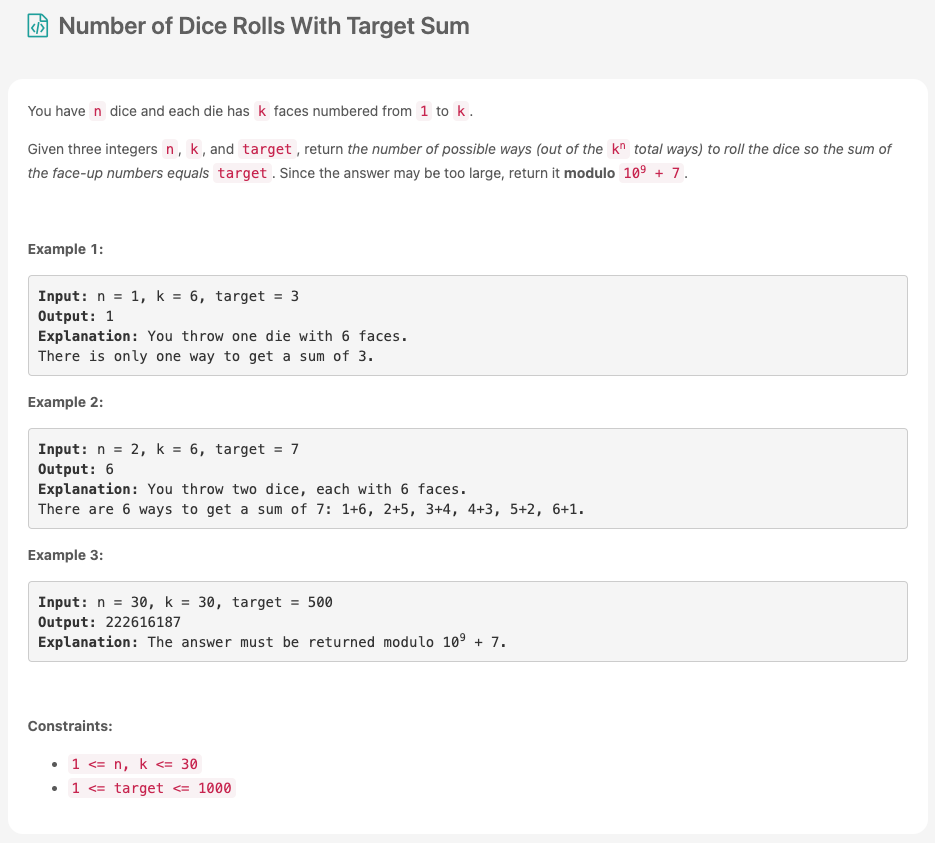

In [ ]:
# Number of Dice Rolls With Target Sum

In [ ]:
# Accepted v1
class Solution:
    def numRollsToTarget(self, n: int, k: int, target: int) -> int:
        @lru_cache(None)
        def dp(dice_num, target_num):
            if dice_num<0 or target_num<0:
                return 0
            
            elif target_num<dice_num or target_num>dice_num*k:
                return 0
            
            elif target_num == dice_num or target_num==dice_num*k:
                return 1
            
            elif dice_num==1:
                if target_num!=0:
                    return 1
                else:
                    return 0
                
            elif dice_num==0:
                if target_num==0:
                    return 1
                else:
                    return 0
            else:
                print(dice_num)
                ways = 0
                for i in range(1,k+1):
                    ways += dp(dice_num-1, target_num-i)
                    # print(i, dice_num-1, target_num-i, ways)
                return ways
            
        return dp(n, target) % (10**9+7)

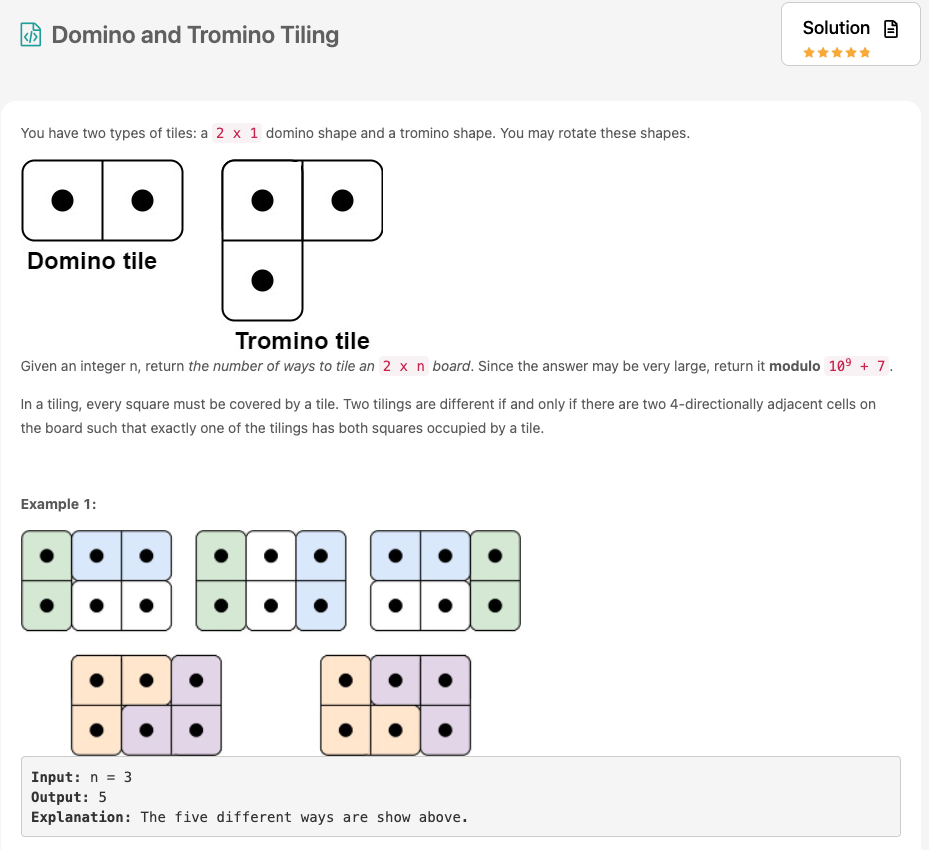

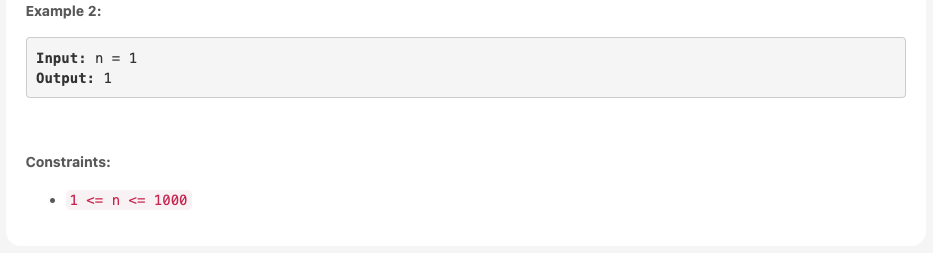

In [ ]:
# Domino and Tromino Tiling

In [ ]:
"""
抽象、复杂但强烈的问题

"""